# Part 1) K-Means Example <br>
George Miloshevich and Francesco Carella

This part of tutorial comes from https://neptune.ai/blog/k-means-clustering

Now that you are familiar with Clustering and K-means algorithms, it’s time to implement K-means using Python and see how it works on real data. 

We will be working on the Mall Visitors dataset to create customer segmentation to define a marketing strategy. The Mall Visitors sample dataset can be found on Kaggle and it summarises the spendings of around 2000 mall visitors.

Let’s clean, explore and prepare the data for the next phases where we will be segmenting customers.

Load the data and check for any missing values:



In [10]:
colab = False
if colab:
    !pip install -r requirements.txt

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
customer_data = pd.read_csv("./data/Mall_Customers.csv")

# Read the data
customer_data.head()

# Check for null or missing values
customer_data.isna().sum()
customer_data.drop('Genre', axis=1, inplace=True)
customer_data

,CustomerID,Age,Annual_Income_(k$),Spending_Score
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


We will be using the Annual Income and Spending Score to find the clusters in the data. The spending score is from 1 to 100 and is assigned based on customer behavior and spending nature. 

## Implementing K-Means from scratch
There are open-source libraries that provide functions for different types of clustering algorithms but before using these open-source codes just by calling a function, it is important to understand how those functions work. In this section, we will be building a K-means clustering algorithm from scratch using a random centroid initialization method. 

Let’s look at the data and see how it is distributed:



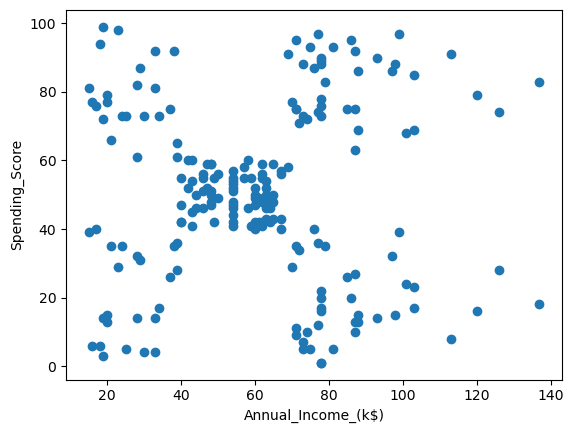

In [2]:
plt.scatter(customer_data['Annual_Income_(k$)'],customer_data['Spending_Score'])
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending_Score')
plt.show()

From the above scatterplot, it is difficult to tell if there is any pattern in the dataset. This is where clustering will help.

First, we will Initialize centroids randomly:

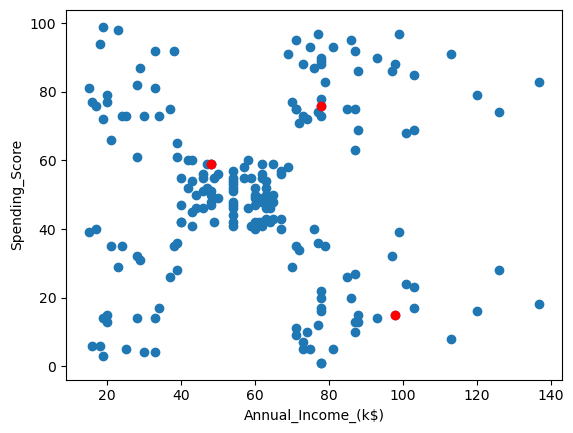

In [3]:
# Set the number of clusters
K = 3
# Select initial centroids randomly
centroids = customer_data.sample(n=K)
plt.scatter(customer_data['Annual_Income_(k$)'],customer_data['Spending_Score'])
plt.scatter(centroids['Annual_Income_(k$)'],centroids['Spending_Score'],c='red')
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending_Score')
plt.show()

Next, we will iterate through each centroid and data point, calculate the distance between them, find the K clusters and assign the data points to a significant cluster. This process will continue until the difference between previously defined centroids and current centroids is zero:

In [4]:

# Create a mask to filter out the centroids from the customer_data
mask = customer_data['CustomerID'].isin(centroids.CustomerID.tolist())

# Filter out the centroids from the customer_data
X = customer_data[~mask].copy()  # Create a deep copy of the DataFrame

# Initialize the difference variable
diff = 1

# Initialize the iteration variable
j = 0

# Create a copy of X dataframe
XD = X.copy()

while(diff != 0):
    # Initialize the cluster index
    i = 1
    for index1, row_c in centroids.iterrows():
        # Initialize the Euclidean distance list
        ED = []
        for index2, row_d in XD.iterrows():
            # Calculate the squared difference in Annual Income and Spending Score
            d1 = (row_c["Annual_Income_(k$)"] - row_d["Annual_Income_(k$)"])**2
            d2 = (row_c["Spending_Score"] - row_d["Spending_Score"])**2
            # Calculate the Euclidean distance
            d = np.sqrt(d1 + d2)
            # Append the Euclidean distance to the list
            ED.append(d)
        # Assign the Euclidean distance list to the corresponding column in X dataframe using .loc
        X.loc[:, i] = np.array(ED)
        # Increment the cluster index
        i = i + 1

    # Initialize the cluster list
    C = []
    for index, row in X.iterrows():
        # Initialize the minimum distance
        min_dist = row[1]
        # Initialize the cluster position
        pos = 1
        for k in range(K):
            # Check if the distance is smaller than the minimum distance
            if row[k+1] < min_dist:
                # Update the minimum distance and cluster position
                min_dist = row[k+1]
                pos = k+1
        # Append the cluster position to the list
        C.append(pos)

    # Assign the cluster list to the "Cluster" column in X dataframe using .loc
    X.loc[:, "Cluster"] = C

    # Calculate the new centroids
    centroids_new = X.groupby(["Cluster"]).mean()[["Spending_Score", "Annual_Income_(k$)"]]

    # Calculate the difference between the new and old centroids
    if j == 0:
        diff = 1
        j = j + 1
    else:
        diff = (centroids_new['Spending_Score'] - centroids['Spending_Score']).sum() + (centroids_new['Annual_Income_(k$)'] - centroids['Annual_Income_(k$)']).sum()

    # Update the centroids
    centroids = centroids_new

Now if we will view the dataset and all the data points should be clustered accordingly:

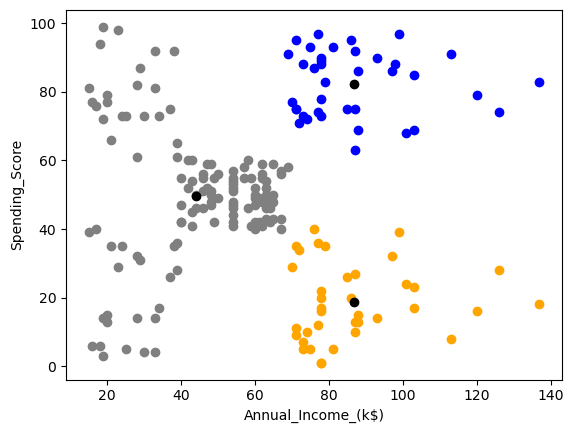

In [5]:
color=['grey','blue','orange']
for k in range(K):
   data=X[X["Cluster"]==k+1]
   plt.scatter(data["Annual_Income_(k$)"],data["Spending_Score"],c=color[k])
plt.scatter(centroids["Annual_Income_(k$)"],centroids["Spending_Score"],c='black')
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending_Score')
plt.show()

## Implementation K-means using Scikit-Learn
That was quite a lot of code and the algorithm might also need some optimization to improve its run time. To avoid enhancing the algorithm and writing it all over again, we can use open-source library functions. Scikit Learn has a clustering package that includes a K-means function which is optimized and very popular among researchers.

>Tip:
>Check how you can keep track of your classifiers, regressors, and k-means clustering results when using Scikit-Learn.

First, we will import the K-Means function then call the function by passing the number of clusters as an argument:


In [6]:
from sklearn.cluster import KMeans
km_sample = KMeans(n_clusters=3)
km_sample.fit(customer_data[['Annual_Income_(k$)','Spending_Score']])

KMeans(n_clusters=3)

That’s all, your clustered data is ready. Let’s look at the data again:

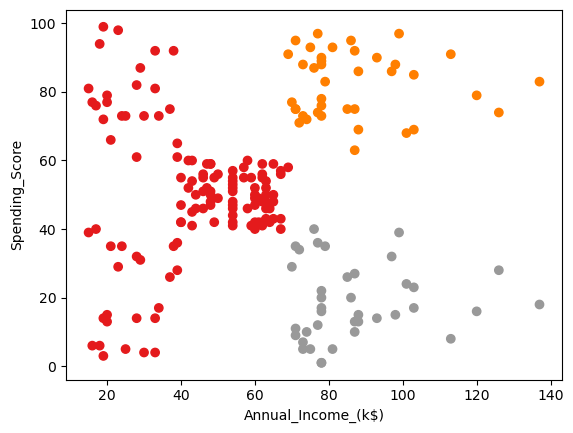

In [8]:
import matplotlib.pyplot as plt
labels_sample = km_sample.labels_
customer_data['label'] = labels_sample
plt.scatter(customer_data['Annual_Income_(k$)'], customer_data['Spending_Score'], c=customer_data['label'], cmap='Set1')
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending_Score')
plt.show()

We were able to create customer segmentation, with only a few lines of code using Scikit-Learn. Though for this particular dataset, you can see the final clustered data is the same in both the implementations. But what did we learn about the mall customers through this segmentation

## How to choose K?
Some factors can challenge the efficacy of the final output of the K-means clustering algorithm and one of them is finalizing the number of clusters(K). Selecting a lower number of clusters will result in underfitting while specifying a higher number of clusters can result in overfitting. Unfortunately, there is no definitive way to find the optimal number. 

The optimal number of clusters depends on the similarity measures and the parameters used for clustering. So, to find the number of clusters in the data, we need to run the k-means clustering for a range of values and compare the outcomes. At present, we don’t have any method to determine the exact accurate value of clusters K but we can estimate the value using some techniques, including Cross-validation, Elbow method, Information Criteria, the Silhouette method, and the G-means algorithm. 

### Elbow method
The distance metric is one of the commonly used metrics to compare results across different K values. When the number of clusters, K is increased, the distance from centroid to data points will be decreased and will reach a point where K is the same as the number of data points. This is the reason we have been using the mean of the distance to the centroids. In the elbow method, we plot the mean distance and look for the elbow point where the rate of decrease shifts. This elbow point can be used to determine K. 